**Binomial Distribution** : Binomial distribution is a discrete probability distribution which has several applications in business contexts. A random variable is said to follow a binomial distriution when:
    a. It can have 2 outcomes: success and failure
    b. Getting x successes out of n trials
    c. Probability p is constant throughout the event.
    
PMF(x) = P(X=x) = (nCx)* (p

Problem statement : SREE CLOTHING is a clothing company selling clothes on a daily basis. It is observed that 10% of their customers return the items for many reasons. On a specific day, 20 customers purchased items from the shop. Calculate:
1. Probability that exactly 5 customers will return the items.
2. Probability that a maximum of 5 customers will return the items.
3. Probability that more than 5 customers will return the items.
4. Average number of customers who are likely to return the items and the variance and the standard deviation of the number of returns.

1.Probability that exactly 5 customers will return the items
We will use scipy library in this case.
The function stats.binom.pmf() calculates PMF for binomial distribution and takes the three parameters.
Successful trials, Total trials, Probability of success.

In [1]:
from scipy import stats
stats.binom.pmf(5, 20, 0.1)

0.03192136111995428

To visualise how the PMF varies with increasing number of successful trials, lets create a list with all number of successes ( 0 to 20) and draw a bar plot.

In [2]:
import pandas as pd

In [3]:
pmf_data = pd.DataFrame({'success' : range(0,21), 'pmf' : list(stats.binom.pmf(range(0,21), 20, 0.1) )})

In [4]:
# for plotting the data
import seaborn as sn
import matplotlib.pyplot as plt

Text(0.5, 0, 'Number of items returned')

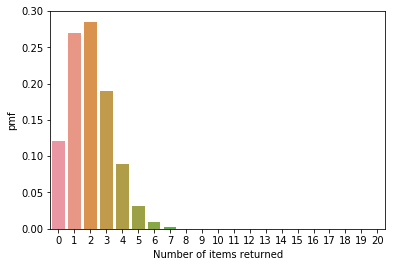

In [6]:
sn.barplot(x = pmf_data.success, y = pmf_data.pmf)
plt.ylabel('pmf')
plt.xlabel('Number of items returned')

2. Probability that maximum of 5 customers will return the items.
stats.binom.cdf() computes the CDF for binomial distribution.

In [7]:
stats.binom.cdf(5, 20, 0.1)

0.988746865835491

3. Probability that more than 5 customers will return the items.

In [8]:
1 - stats.binom.cdf(5, 20, 0.1)

0.011253134164509015

Average number of customers who are likely to return the items and the variance and the standard deviation of the number of returns.
Average is given by n*p
Variance is given by n*p*(1-p)

In [9]:
mean,var = stats.binom.stats(20, 0.1)
print('Average :', mean, 'Variance :', var)

Average : 2.0 Variance : 1.8


**Poisson Distribution**: It is used in calculating the number of events that may occur over a period of time and space.
We need a rate of occurence denoted by 

Problem Statement: The number of cash withdrawals at an ATM follows a Poisson Distribution at 10 withdrawals per hour.
Calculate:
1. Probability that  maximum of 5 withdrawals will happen.
2. Probability that a number of withdrawals over a period of 3 hours will exceed 30.

1. Probability that maximum of 5 withdrawals will happen.

We need two parameters - the total number of events in this case and the lambda(average number of events per hour), here 10*1 = 10 

In [10]:
stats.poisson.cdf(5, 10)

0.06708596287903189

2.Probability that a number of withdrawals over a period of 3 hours will exceed 30.

The total number of events in this case is 30.
Here mean number of events is equal to the product of lambda and the time = 3*10 = 30.

In [11]:
# will be 30
#stats.poisson.cdf(30, 30)
#exceed 30
1-stats.poisson.cdf(30, 30)

0.45164848742208863

Visualising the PMF varying with increasing number of withdrawals ranging from 0 to 30, with average withdrawals per hour = 10

In [14]:
pmf_data_poisson = pd.DataFrame({'success' : range(0, 31), 'pmf' : list(stats.poisson.pmf(range(0,31), 10))})

Text(0, 0.5, 'pmf')

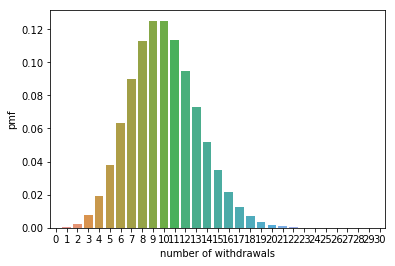

In [15]:
sn.barplot(x = pmf_data_poisson.success, y = pmf_data_poisson.pmf)
plt.xlabel('number of withdrawals')
plt.ylabel('pmf')

**Exponential Distribution**: It is a single parameter continuous probability distribution that is used for modeling time-to-failure of electronic components or the radioactivity of chemical elements. The random variable here is continuous in nature and occurs independently at a constant average rate.

Probelem statement : The time to failure of a gadget follows an Exponential Distribution with a mean time between failures of 1000 hrs. Calculate:
1. Probability that gagdet will fail before 1000 hrs.
2. Probability that gagdet will not fail upto 2000 hrs.
3. The time by which 10% of the gadget will fail.

1.Probability that gagdet will fail before 1000 hrs.

CDF upto 1000 will give the probability of failing before 1000 hrs. 
The stats.expon.cdf() function takes parameters the number of hrs, the mean, and scale of exponential distribution.

In [22]:
stats.expon.cdf(1000, 1/1000, 1000)

0.6321201909489326

2. Probability that gagdet will not fail upto 2000 hrs.

In [23]:
1 - stats.expon.cdf(2000, 1/1000, 1000)

0.13533541857196352

3. The time by which 10% of the gadget will fail.

This is calculated by ppf(percent point function) and is an inverse of CDF. stats.expon.ppf() takes the percent point value and the mean and the scale of the exponential distribution.

In [24]:
stats.expon.ppf(0.1, 1/1000, 1000)

105.36151565782632

Visualising the PDF against various time-to-fail hours ranging from 100 to 5000

Text(0, 0.5, 'pdf')

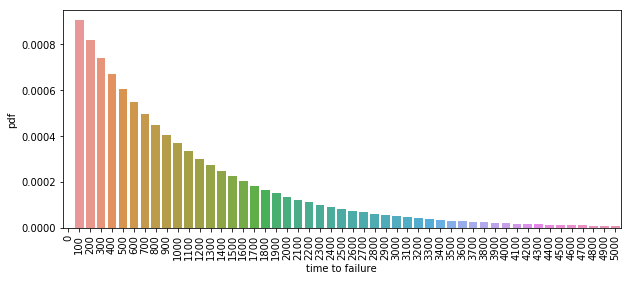

In [28]:
pdf_data_expon = pd.DataFrame({'success': range(0, 5100, 100), 'pdf' : stats.expon.pdf(range(0,5100,100), 1/1000, 1000)})
plt.figure(figsize = (10,4))
sn.barplot(x = pdf_data_expon.success, y = pdf_data_expon.pdf)
plt.xticks(rotation = 90)
plt.xlabel('time to failure')
plt.ylabel('pdf')

**Normal distrubution** : It is one of the most popular continuos distribution. It is used in naturally occuring measures like age,salary,sales vloume, birth-weight, height,etc.

Problem Statement: The heights of adult females are normally distributed with mean = 160cm and sd= 8cm.
1. Probability that any random selected female has height greater than 170cm.
2. Probability that any random selected female has height greater than 180cm provided she is tall, tall means height greater than 170cm.

1. Probability that any random selected female has height greater than 170cm.
The stats.norm() function takes mean and sd as parameters. The stats.norm().pdf() takes the event variable, mean, and the scale as parameters.

In [29]:
#less equal to 170cm
#stats.norm(160,8).cdf(170)
1-stats.norm(160,8).cdf(170)

0.10564977366685535

2. Probability that any random selected female has height greater than 180cm provided she is tall, tall means height greater than 170cm.

We will use conditional probability here, the probability of intersection of both the person greater than 170cm and 180cm simultaneously indicate that the person is greater than 180cm. Therefore the intersection of the events implies that the peron must be greater than 180cm.

In [30]:
#numerator = probability person is greater than 180.
1- stats.norm(160,8).cdf(180)

0.006209665325776159

In [31]:
#denominator = probability person is greater than 170cm
1- stats.norm(160,8).cdf(170)

0.10564977366685535

In [32]:
#ans = 
0.006209665325776159/0.10564977366685535

0.058775945373598724

Visualising the PDF against various heights ranging from 140cm to 180cm

Text(0, 0.5, 'pdf')

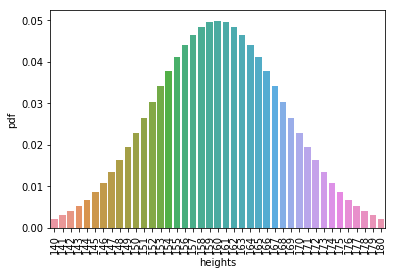

In [38]:
pdf_data_norm = pd.DataFrame({'success': range(140,181), 'pdf': stats.norm(160,8).pdf(range(140,181))})
sn.barplot(x = pdf_data_norm.success, y = pdf_data_norm.pdf)
plt.xticks(rotation = 90)
plt.xlabel('heights')
plt.ylabel('pdf')